In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
file_path = '/content/Gold Price Prediction Dataset.csv'
df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend
0,15-12-11,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,A,105.09,104.88,106.50,104.88,14330,A
1,16-12-11,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,A,103.35,103.51,104.56,102.46,140080,B
2,19-12-11,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,B,103.64,103.63,104.57,102.37,147880,A
3,20-12-11,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,A,106.73,104.30,107.27,103.91,170240,A
4,21-12-11,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,NaN,NaN,122.750000,124.169998,107.838242,B,107.71,107.15,108.17,106.16,145090,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,24-12-18,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,234.339996,A,50.47,53.49,54.66,50.36,76220,B
1714,26-12-18,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,246.179993,B,54.47,50.84,55.29,49.93,77000,A
1715,27-12-18,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,248.070007,A,52.16,54.65,54.67,51.94,102590,B
1716,28-12-18,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,247.750000,A,52.20,53.44,53.80,51.60,17110,A


In [62]:
print("Null values per column:\n", df.isnull().sum())
df_clean = df.dropna()

df_clean

Null values per column:
 Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
SP_open       21
SP_high       21
SP_low         0
SP_close       0
SP_Ajclose     0
EU_Trend       0
OF_Price       0
OF_Open        0
OF_High        0
OF_Low         0
OF_Volume      0
OF_Trend       0
dtype: int64


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend
0,15-12-11,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,A,105.09,104.88,106.50,104.88,14330,A
1,16-12-11,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,A,103.35,103.51,104.56,102.46,140080,B
2,19-12-11,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,B,103.64,103.63,104.57,102.37,147880,A
3,20-12-11,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,A,106.73,104.30,107.27,103.91,170240,A
25,24-01-12,161.809998,162.369995,161.529999,162.009995,162.009995,7502100,130.800003,131.500000,130.600006,131.460007,114.169380,B,110.03,110.84,111.11,109.70,178430,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,24-12-18,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,234.339996,A,50.47,53.49,54.66,50.36,76220,B
1714,26-12-18,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,246.179993,B,54.47,50.84,55.29,49.93,77000,A
1715,27-12-18,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,248.070007,A,52.16,54.65,54.67,51.94,102590,B
1716,28-12-18,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,247.750000,A,52.20,53.44,53.80,51.60,17110,A


In [63]:
print("Duplicate rows: ", df_clean.duplicated().sum())

df_clean = df_clean.drop_duplicates()
df_clean

Duplicate rows:  0


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend
0,15-12-11,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,A,105.09,104.88,106.50,104.88,14330,A
1,16-12-11,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,A,103.35,103.51,104.56,102.46,140080,B
2,19-12-11,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,B,103.64,103.63,104.57,102.37,147880,A
3,20-12-11,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,A,106.73,104.30,107.27,103.91,170240,A
25,24-01-12,161.809998,162.369995,161.529999,162.009995,162.009995,7502100,130.800003,131.500000,130.600006,131.460007,114.169380,B,110.03,110.84,111.11,109.70,178430,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,24-12-18,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,234.339996,A,50.47,53.49,54.66,50.36,76220,B
1714,26-12-18,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,246.179993,B,54.47,50.84,55.29,49.93,77000,A
1715,27-12-18,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,248.070007,A,52.16,54.65,54.67,51.94,102590,B
1716,28-12-18,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,247.750000,A,52.20,53.44,53.80,51.60,17110,A


In [64]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], infer_datetime_format=True, errors='coerce')

df_clean['Day'] = df_clean['Date'].dt.day
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Year'] = df_clean['Date'].dt.year

df_clean = df_clean.drop(columns=['Date'])

df_clean

<ipython-input-64-071569e1f87c>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_clean['Date'] = pd.to_datetime(df_clean['Date'], infer_datetime_format=True, errors='coerce')
<ipython-input-64-071569e1f87c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Date'] = pd.to_datetime(df_clean['Date'], infer_datetime_format=True, errors='coerce')


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,Day,Month,Year
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,A,105.09,104.88,106.50,104.88,14330,A,15,12,2011
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,A,103.35,103.51,104.56,102.46,140080,B,16,12,2011
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,B,103.64,103.63,104.57,102.37,147880,A,19,12,2011
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,A,106.73,104.30,107.27,103.91,170240,A,20,12,2011
25,161.809998,162.369995,161.529999,162.009995,162.009995,7502100,130.800003,131.500000,130.600006,131.460007,...,B,110.03,110.84,111.11,109.70,178430,B,24,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,A,50.47,53.49,54.66,50.36,76220,B,24,12,2018
1714,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,B,54.47,50.84,55.29,49.93,77000,A,26,12,2018
1715,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,A,52.16,54.65,54.67,51.94,102590,B,27,12,2018
1716,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,...,A,52.20,53.44,53.80,51.60,17110,A,28,12,2018


In [65]:
lowest_Adj_Close = df_clean['Adj Close'].min()
highest_Adj_Close = df_clean['Adj Close'].max()

print(f"Lowest Adj Close: {lowest_Adj_Close}")
print(f"Highest Adj Close: {highest_Adj_Close}")

bins = [0, 100, 150, highest_Adj_Close]

Adj_Close_counts = pd.cut(df_clean['Adj Close'], bins=bins).value_counts()

Adj_Close_counts

Lowest Adj Close: 100.5
Highest Adj Close: 173.610001


,count
Adj Close,
"(100.0, 150.0]",1395
"(150.0, 173.61]",302
"(0.0, 100.0]",0


In [66]:
bins = [0, 100, 150, 175]
labels = ['Low', 'Medium', 'High']

df_clean['Adj_Close_category'] = pd.cut(df_clean['Adj Close'], bins=bins, labels=labels)

In [67]:
df_clean

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,Day,Month,Year,Adj_Close_category
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,105.09,104.88,106.50,104.88,14330,A,15,12,2011,High
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,103.35,103.51,104.56,102.46,140080,B,16,12,2011,High
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,103.64,103.63,104.57,102.37,147880,A,19,12,2011,High
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,106.73,104.30,107.27,103.91,170240,A,20,12,2011,High
25,161.809998,162.369995,161.529999,162.009995,162.009995,7502100,130.800003,131.500000,130.600006,131.460007,...,110.03,110.84,111.11,109.70,178430,B,24,1,2012,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,50.47,53.49,54.66,50.36,76220,B,24,12,2018,Medium
1714,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,54.47,50.84,55.29,49.93,77000,A,26,12,2018,Medium
1715,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,52.16,54.65,54.67,51.94,102590,B,27,12,2018,Medium
1716,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,...,52.20,53.44,53.80,51.60,17110,A,28,12,2018,Medium


In [ ]:
features_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low']

scaler = StandardScaler()
df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

df_clean

In [68]:
df_clean['EU_Trend'] = df_clean['EU_Trend'].replace({'A': 0, 'B': 1})
df_clean['OF_Trend'] = df_clean['OF_Trend'].replace({'A': 0, 'B': 1})

df_clean

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,Day,Month,Year,Adj_Close_category
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,105.09,104.88,106.50,104.88,14330,0,15,12,2011,High
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,103.35,103.51,104.56,102.46,140080,1,16,12,2011,High
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,103.64,103.63,104.57,102.37,147880,0,19,12,2011,High
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,106.73,104.30,107.27,103.91,170240,0,20,12,2011,High
25,161.809998,162.369995,161.529999,162.009995,162.009995,7502100,130.800003,131.500000,130.600006,131.460007,...,110.03,110.84,111.11,109.70,178430,1,24,1,2012,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,50.47,53.49,54.66,50.36,76220,1,24,12,2018,Medium
1714,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,54.47,50.84,55.29,49.93,77000,0,26,12,2018,Medium
1715,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,52.16,54.65,54.67,51.94,102590,1,27,12,2018,Medium
1716,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,...,52.20,53.44,53.80,51.60,17110,0,28,12,2018,Medium


In [69]:
df_clean['Adj_Close_category'] = df_clean['Adj_Close_category'].replace({'Low': 0, 'Medium': 1, 'High': 2})

df_clean

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,Day,Month,Year,Adj_Close_category
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,105.09,104.88,106.50,104.88,14330,0,15,12,2011,2
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,103.35,103.51,104.56,102.46,140080,1,16,12,2011,2
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,103.64,103.63,104.57,102.37,147880,0,19,12,2011,2
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,106.73,104.30,107.27,103.91,170240,0,20,12,2011,2
25,161.809998,162.369995,161.529999,162.009995,162.009995,7502100,130.800003,131.500000,130.600006,131.460007,...,110.03,110.84,111.11,109.70,178430,1,24,1,2012,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,50.47,53.49,54.66,50.36,76220,1,24,12,2018,1
1714,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,54.47,50.84,55.29,49.93,77000,0,26,12,2018,1
1715,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,52.16,54.65,54.67,51.94,102590,1,27,12,2018,1
1716,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,...,52.20,53.44,53.80,51.60,17110,0,28,12,2018,1


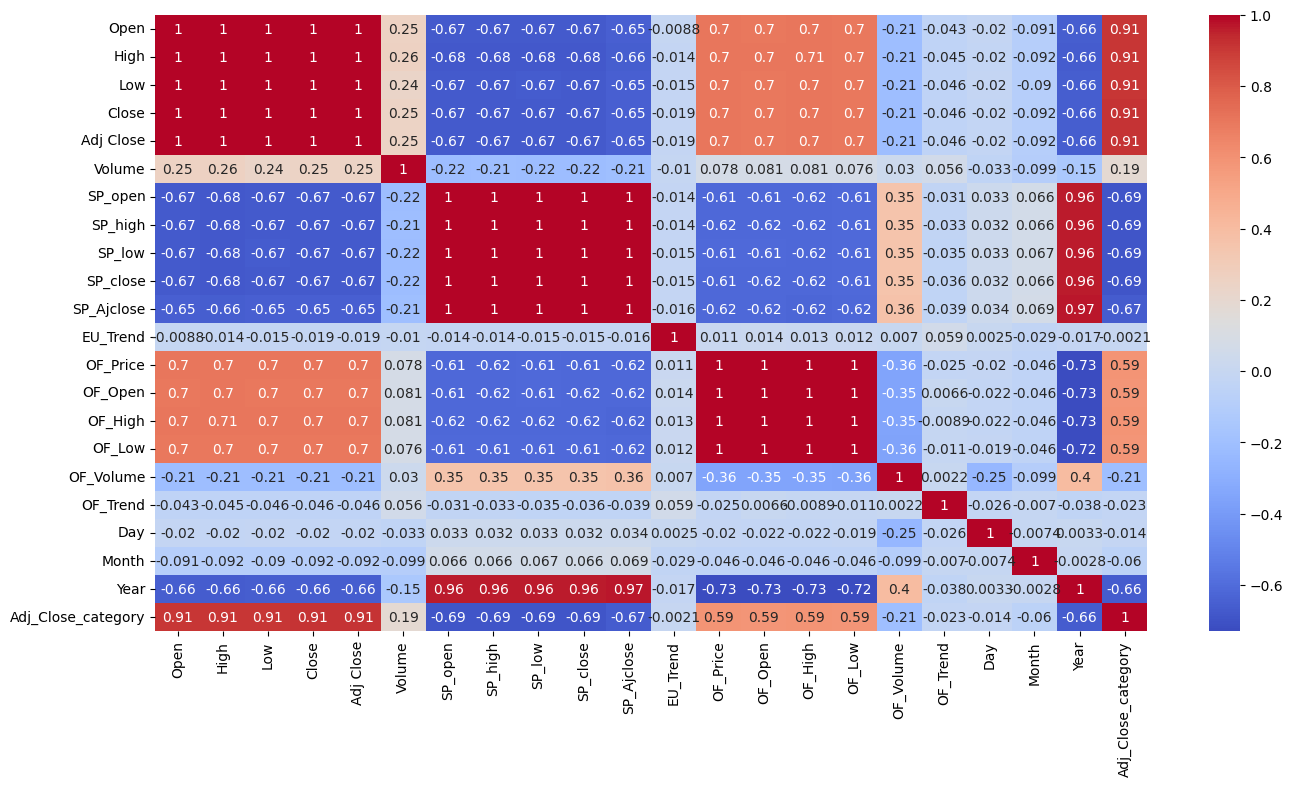

Dropped highly correlated features: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'EU_Trend', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'Day', 'Month', 'Year', 'Adj_Close_category']


In [70]:
corr_matrix = df_clean.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

threshold = 0.8
high_corr_vars = [col for col in corr_matrix.columns if any(corr_matrix[col] > threshold)]

df_final = df_clean.drop(columns=high_corr_vars)
print(f"Dropped highly correlated features: {high_corr_vars}")

In [77]:
X = df_clean.drop(columns=['Adj Close'])
y = df_clean['Adj Close']

print("Features (X):\n", X)
print("Target (y):\n", y)

Features (X):
             Open        High         Low       Close    Volume     SP_open  \
0     154.740005  154.949997  151.710007  152.330002  21521900  123.029999   
1     154.309998  155.369995  153.899994  155.229996  18124300  122.230003   
2     155.479996  155.860001  154.360001  154.869995  12547200  122.059998   
3     156.820007  157.429993  156.580002  156.979996   9136300  122.180000   
25    161.809998  162.369995  161.529999  162.009995   7502100  130.800003   
...          ...         ...         ...         ...       ...         ...   
1713  119.570000  120.139999  119.570000  120.019997   9736400  239.039993   
1714  120.620003  121.000000  119.570000  119.660004  14293500  235.970001   
1715  120.570000  120.900002  120.139999  120.570000  11874400  242.570007   
1716  120.800003  121.080002  120.720001  121.059998   6864700  249.580002   
1717  120.980003  121.260002  120.830002  121.250000   8449400  249.559998   

         SP_high      SP_low    SP_close  SP_Ajc

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size: ", X_train.shape)
print("Testing data size: ", X_test.shape)

Training data size:  (1357, 21)
Testing data size:  (340, 21)


In [80]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R²: {r2_lr}")

Linear Regression MAE: 4.1614272811998756e-11
Linear Regression MSE: 3.0061423819287737e-21
Linear Regression R²: 1.0


In [81]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R²: {r2_rf}")

Random Forest MAE: 0.06260190658823048
Random Forest MSE: 0.07904118116249892
Random Forest R²: 0.9997382170415323


In [72]:
X = df_clean.drop(columns=['Adj_Close_category'])
y = df_clean['Adj_Close_category']

print("Features (X):\n", X)
print("Target (y):\n", y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size: ", X_train.shape)
print("Testing data size: ", X_test.shape)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

classification_report(y_test, y_pred_log_reg)

Features (X):
             Open        High         Low       Close   Adj Close    Volume  \
0     154.740005  154.949997  151.710007  152.330002  152.330002  21521900   
1     154.309998  155.369995  153.899994  155.229996  155.229996  18124300   
2     155.479996  155.860001  154.360001  154.869995  154.869995  12547200   
3     156.820007  157.429993  156.580002  156.979996  156.979996   9136300   
25    161.809998  162.369995  161.529999  162.009995  162.009995   7502100   
...          ...         ...         ...         ...         ...       ...   
1713  119.570000  120.139999  119.570000  120.019997  120.019997   9736400   
1714  120.620003  121.000000  119.570000  119.660004  119.660004  14293500   
1715  120.570000  120.900002  120.139999  120.570000  120.570000  11874400   
1716  120.800003  121.080002  120.720001  121.059998  121.059998   6864700   
1717  120.980003  121.260002  120.830002  121.250000  121.250000   8449400   

         SP_open     SP_high      SP_low    SP_c

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00       278\n           2       1.00      0.98      0.99        62\n\n    accuracy                           1.00       340\n   macro avg       1.00      0.99      1.00       340\nweighted avg       1.00      1.00      1.00       340\n'

In [73]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       278
           2       1.00      0.98      0.99        62

    accuracy                           1.00       340
   macro avg       1.00      0.99      1.00       340
weighted avg       1.00      1.00      1.00       340



In [51]:
print("\nModel Comparison:")
print(f"Linear Regression: MAE={mae_lr}, MSE={mse_lr}, R²={r2_lr}")
print(f"Random Forest: MAE={mae_rf}, MSE={mse_rf}, R²={r2_rf}")
print(f"Logistic Regression: Classification Report:\n{classification_report(y_test, y_pred_log_reg)}")


Model Comparison:
Linear Regression: MAE=4.1614272811998756e-11, MSE=3.0061423819287737e-21, R²=1.0
Random Forest: MAE=0.06260190658823048, MSE=0.07904118116249892, R²=0.9997382170415323
Logistic Regression: Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       278
           2       1.00      0.98      0.99        62

    accuracy                           1.00       340
   macro avg       1.00      0.99      1.00       340
weighted avg       1.00      1.00      1.00       340



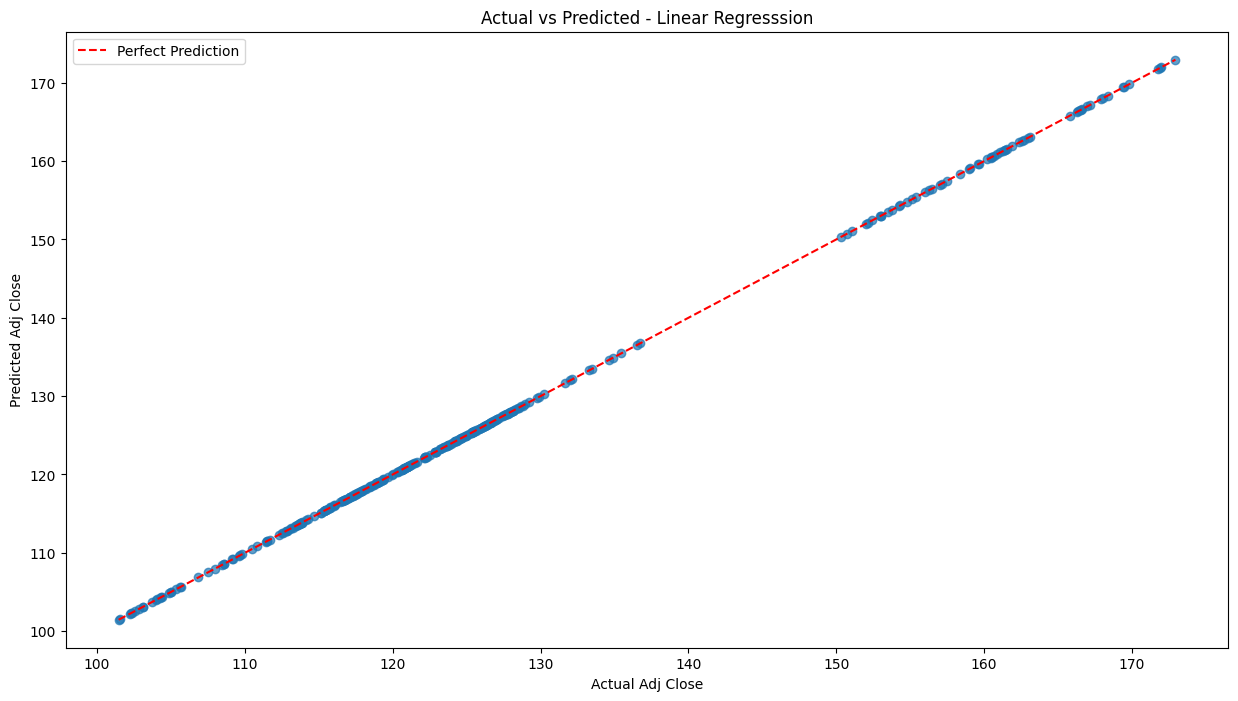

In [57]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted - Linear Regresssion")
plt.xlabel("Actual Adj Close")
plt.ylabel("Predicted Adj Close")
plt.legend()
plt.show()


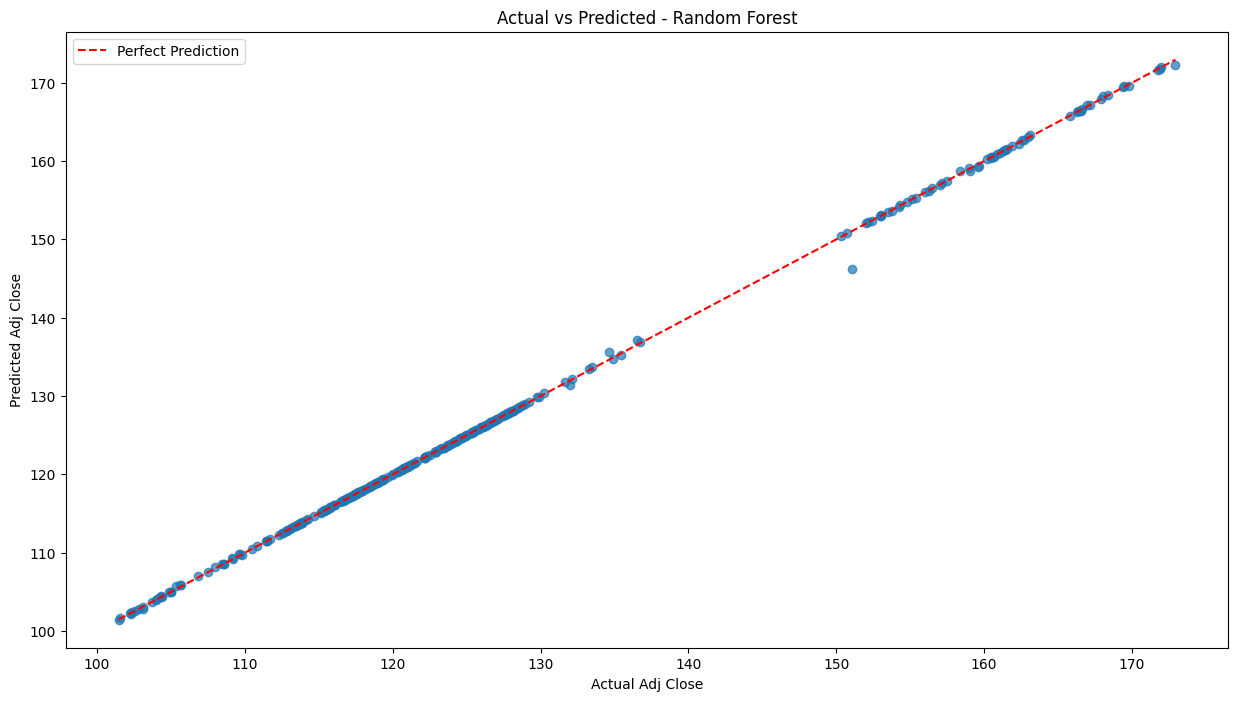

In [59]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted - Random Forest")
plt.xlabel("Actual Adj Close")
plt.ylabel("Predicted Adj Close")
plt.legend()
plt.show()


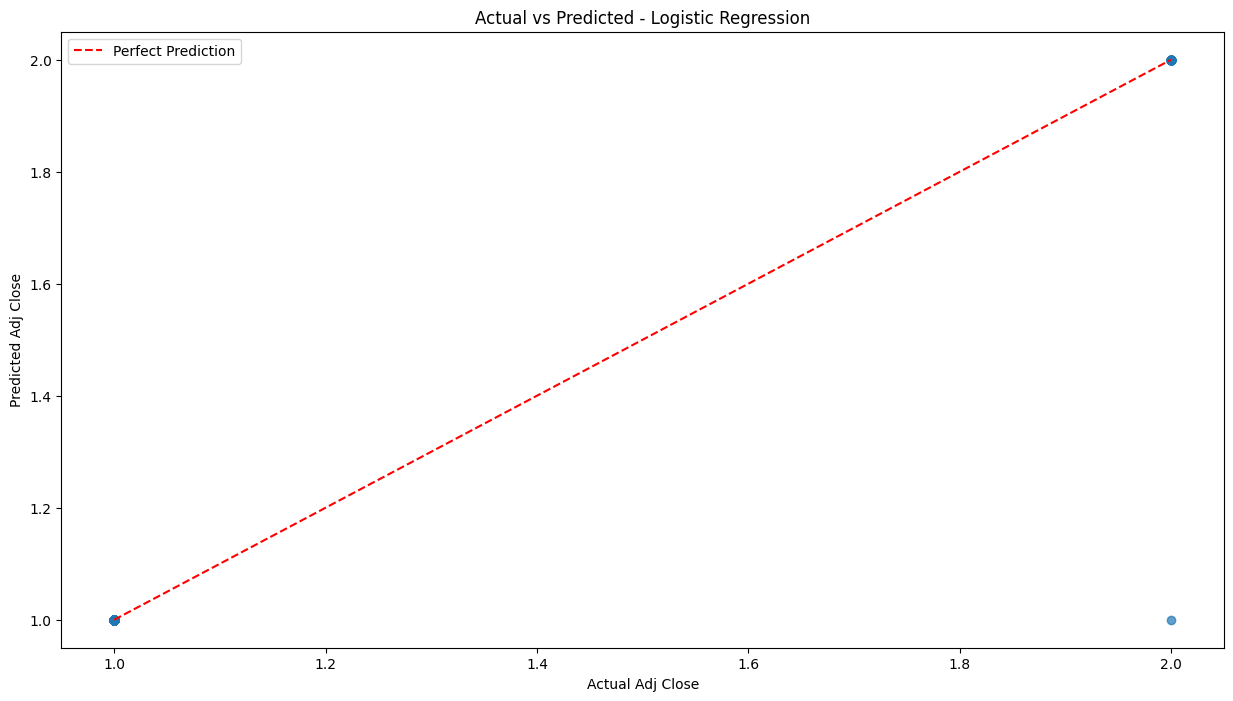

In [74]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test, y_pred_log_reg, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted - Logistic Regression")
plt.xlabel("Actual Adj Close")
plt.ylabel("Predicted Adj Close")
plt.legend()
plt.show()


In [82]:
y_pred1 = lr_model.predict(X_test)

In [83]:
predicted_df1 = pd.DataFrame({
    'Actual': y_test,       # Actual Adj Close values
    'Predicted': y_pred1     # Predicted Adj Close values
})

predicted_df1 = predicted_df1.reset_index(drop=True)

predicted_df1

,Actual,Predicted
0,124.000000,124.000000
1,157.460007,157.460007
2,155.139999,155.139999
3,120.620003,120.620003
4,123.820000,123.820000
...,...,...
335,123.190002,123.190002
336,122.830002,122.830002
337,103.110001,103.110001
338,126.940002,126.940002


In [84]:
y_pred2 = rf_model.predict(X_test)

In [85]:
predicted_df2 = pd.DataFrame({
    'Actual': y_test,       # Actual Adj Close values
    'Predicted': y_pred2     # Predicted Adj Close values
})

predicted_df2 = predicted_df2.reset_index(drop=True)

predicted_df2

,Actual,Predicted
0,124.000000,123.956800
1,157.460007,157.458396
2,155.139999,155.178300
3,120.620003,120.627702
4,123.820000,123.801401
...,...,...
335,123.190002,123.216200
336,122.830002,122.835800
337,103.110001,102.849901
338,126.940002,126.969300


In [75]:
y_pred3 = log_reg.predict(X_test)

In [76]:
predicted_df3 = pd.DataFrame({
    'Actual': y_test,       # Actual Adj Close values
    'Predicted': y_pred3     # Predicted Adj Close values
})

predicted_df3 = predicted_df3.reset_index(drop=True)

predicted_df3

,Actual,Predicted
0,1,1
1,2,2
2,2,2
3,1,1
4,1,1
...,...,...
335,1,1
336,1,1
337,1,1
338,1,1
